# Melanoma Cancer Detection Group Case Study 

In [30]:
# Importing all the important libraries
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob

In [32]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("D:\MS\Deep Learning\CNN\Group Case Study Melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
data_dir_test = pathlib.Path("D:\MS\Deep Learning\CNN\Group Case Study Melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Test")

In [33]:
# Checking the data
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


# Create and Load the dataset

In [34]:
# set the parameters
batch_size = 32
img_height = 180
img_width = 180

In [35]:
# Load the dataset using image_dataset_from_directory
import tensorflow as tf

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train, ##changed from val to train
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=0.2
)

Found 4739 files belonging to 9 classes.
Using 3792 files for training.
Found 4739 files belonging to 9 classes.
Using 947 files for validation.


In [36]:
# Print class names
class_names = train_ds.class_names
print("Class names:", class_names)

Class names: ['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Visualize the data

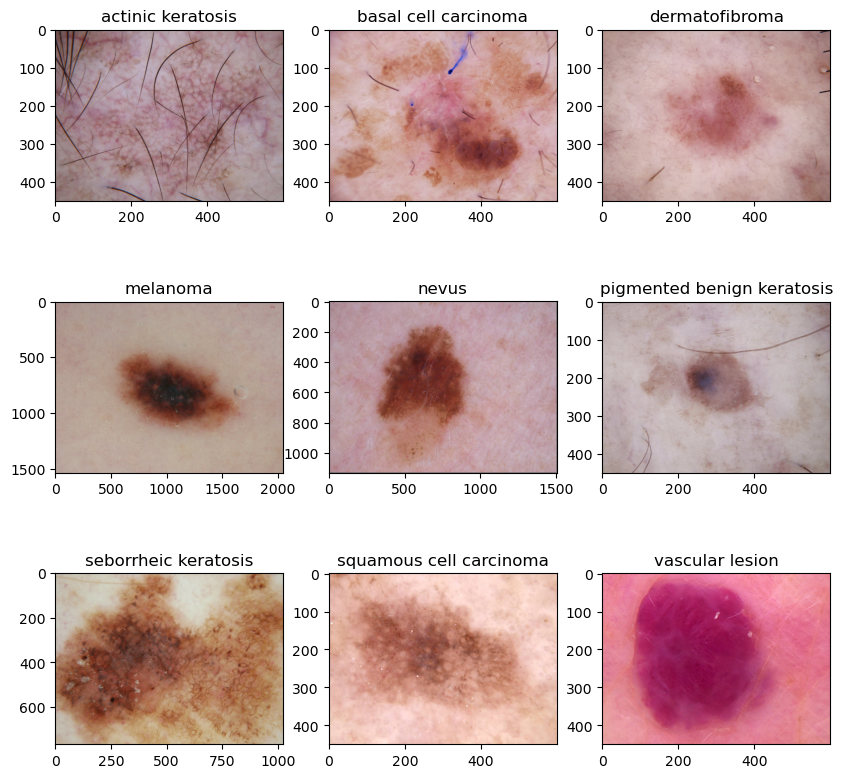

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

In [38]:
# Set up the Autotune 
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

# Creating the Model-1 (3 Convo)

In [39]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dense(num_classes),
  layers.Activation("softmax")
])

In [40]:
# Model compliation
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [41]:
# Printing the summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 45, 45, 64)       

In [42]:
# Training the Model-1
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


C:\Users\rse703589\AppData\Local\anaconda3\Lib\site-packages\keras\src\backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


119/119 [==============================] - 53s 372ms/step - loss: 1.8302 - accuracy: 0.3597 - val_loss: 1.5151 - val_accuracy: 0.4488
Epoch 2/20
119/119 [==============================] - 30s 253ms/step - loss: 1.4806 - accuracy: 0.4670 - val_loss: 1.5707 - val_accuracy: 0.4372
Epoch 3/20
119/119 [==============================] - 31s 263ms/step - loss: 1.3272 - accuracy: 0.5282 - val_loss: 1.5872 - val_accuracy: 0.4794
Epoch 4/20
119/119 [==============================] - 30s 255ms/step - loss: 1.1514 - accuracy: 0.6065 - val_loss: 1.2093 - val_accuracy: 0.5480
Epoch 5/20
119/119 [==============================] - 31s 257ms/step - loss: 1.0280 - accuracy: 0.6411 - val_loss: 1.0846 - val_accuracy: 0.6251
Epoch 6/20
119/119 [==============================] - 30s 255ms/step - loss: 0.8359 - accuracy: 0.7255 - val_loss: 1.0557 - val_accuracy: 0.6547
Epoch 7/20
119/119 [==============================] - 30s 256ms/step - loss: 0.7618 - accuracy: 0.7429 - val_loss: 0.9861 - val_accuracy: 0.6

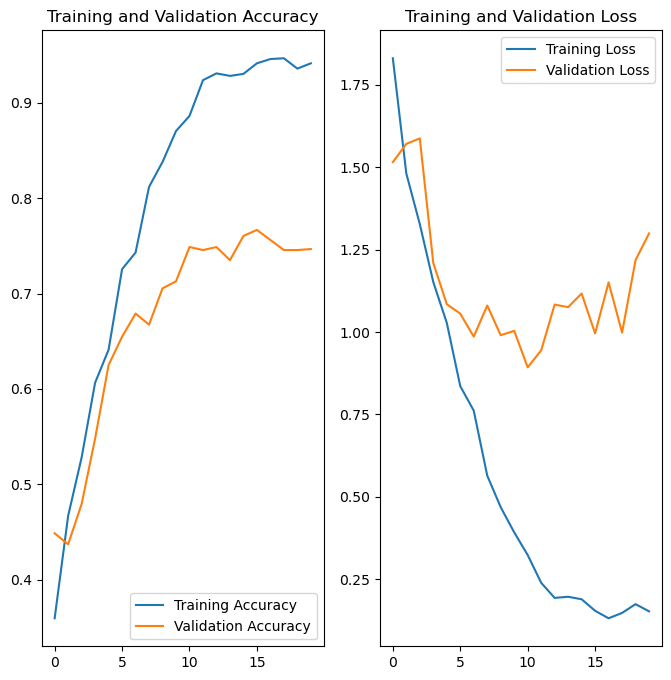

In [43]:
# Visualization of Model Performance
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
# Model Performance
train_score = model.evaluate(train_ds , steps =16 , verbose = 1)
valid_score = model.evaluate(val_ds , steps = 16 , verbose = 1)
#test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)

16/16 [==============================] - 1s 46ms/step - loss: 1.2604 - accuracy: 0.7617
Train Loss:  0.12676258385181427
Train Accuracy:  0.951171875
--------------------
Validation Loss:  1.2604118585586548
Validation Accuracy:  0.76171875
--------------------


#### Finding of Model-1 
Model details: 3 Convolution layers
- Train accuracy : 95%


- Test accuracy : 76%


# Creating the Model 2 (3 Convo with dropout)

In [45]:
# Create model by adding the drop out
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_classes = 9
model2 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(num_classes),
  layers.Activation("softmax")
])

In [46]:
# Compile the model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [47]:
# Model summary
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                                

In [48]:
# Model execuation
epochs = 20
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
119/119 [==============================] - 37s 303ms/step - loss: 2.3376 - accuracy: 0.2637 - val_loss: 1.7658 - val_accuracy: 0.3453
Epoch 2/20
119/119 [==============================] - 35s 295ms/step - loss: 1.5889 - accuracy: 0.3956 - val_loss: 1.7347 - val_accuracy: 0.3928
Epoch 3/20
119/119 [==============================] - 35s 296ms/step - loss: 1.5155 - accuracy: 0.4254 - val_loss: 1.6116 - val_accuracy: 0.3939
Epoch 4/20
119/119 [==============================] - 35s 298ms/step - loss: 1.4726 - accuracy: 0.4581 - val_loss: 1.5951 - val_accuracy: 0.4308
Epoch 5/20
119/119 [==============================] - 35s 296ms/step - loss: 1.3764 - accuracy: 0.5029 - val_loss: 1.4228 - val_accuracy: 0.4984
Epoch 6/20
119/119 [==============================] - 35s 296ms/step - loss: 1.3101 - accuracy: 0.5427 - val_loss: 1.4555 - val_accuracy: 0.4678
Epoch 7/20
119/119 [==============================] - 35s 297ms/step - loss: 1.1797 - accuracy: 0.5876 - val_loss: 1.3599 - val_ac

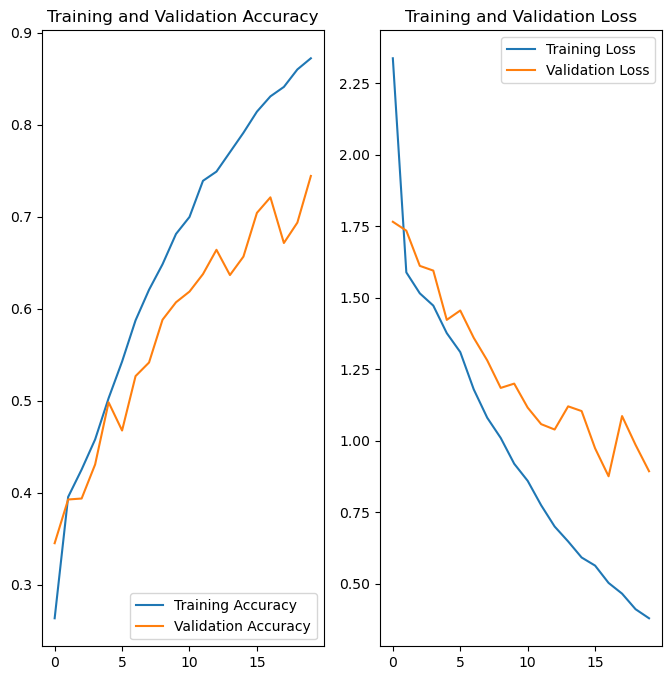

In [49]:
# Visualization the model output
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [90]:
# Model Performance
train_score = model2.evaluate(train_ds , steps =16 , verbose = 1)
valid_score = model2.evaluate(val_ds , steps = 16 , verbose = 1)
#test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)

16/16 [==============================] - 2s 86ms/step - loss: 0.4707 - accuracy: 0.8516
Train Loss:  0.5389280319213867
Train Accuracy:  0.84375
--------------------
Validation Loss:  0.47074154019355774
Validation Accuracy:  0.8515625
--------------------


#### Finding of Model-2 
Model details: 3 Convolution layers with dropout
- Train accuracy : 84%


- Test accuracy : 85%

- The model3 performance is acceptable.

# Creating the Model 3 with Conv, without Dropout and Batchnormalization

In [50]:
# Creating model with 3 convo, without dropout and batchnormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
num_classes = 9
model3 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(num_classes),
  layers.Activation("softmax")
])

#----------------------------------
# Complie the model
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model3.summary())

#-----------------------------------
# Model execution
epochs = 20
history3 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 180, 180, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 90, 90, 32)       

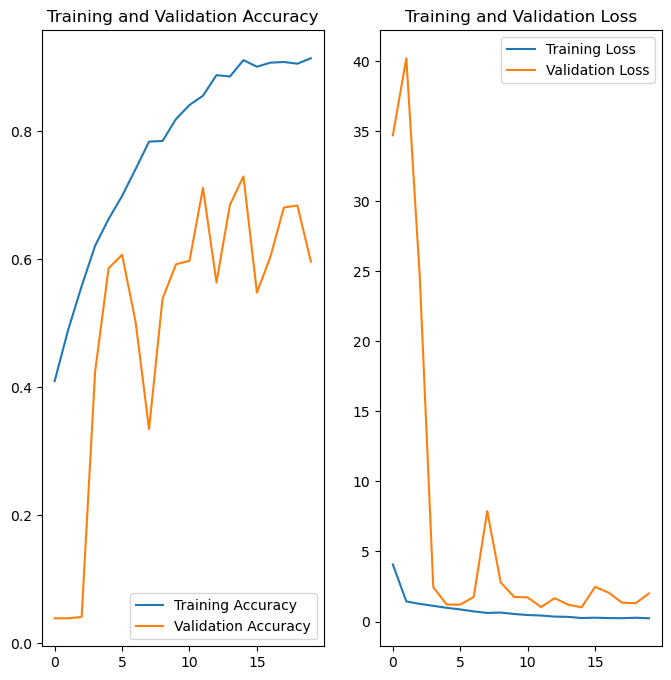

In [97]:
# Model - 3 visualization
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [92]:
# Model Performance
train_score = model3.evaluate(train_ds , steps =16 , verbose = 1)
valid_score = model3.evaluate(val_ds , steps = 16 , verbose = 1)
#test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)

16/16 [==============================] - 2s 87ms/step - loss: 1.2733 - accuracy: 0.7109
Train Loss:  1.318454384803772
Train Accuracy:  0.689453125
--------------------
Validation Loss:  1.2733256816864014
Validation Accuracy:  0.7109375
--------------------


#### Finding of Model-3 
Model details: 3 Convolution layers, without dropout and batchnormalization
- Train accuracy : 69%


- Test accuracy : 71%


# Creating the Model 4 (Convolution, Dropout and Batchnormalization)

In [52]:
# Creating the Model-4 convolution, dropout and batchnormalization
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
num_classes = 9
model4 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.25),
  layers.Dense(num_classes),
  layers.Activation("softmax")
])

#----------------------------------
# Model compilation
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model4.summary())

#-----------------------------------
# Model execution
epochs = 20
history4 = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_3 (Bat  (None, 180, 180, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 90, 90, 16)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 90, 90, 32)       

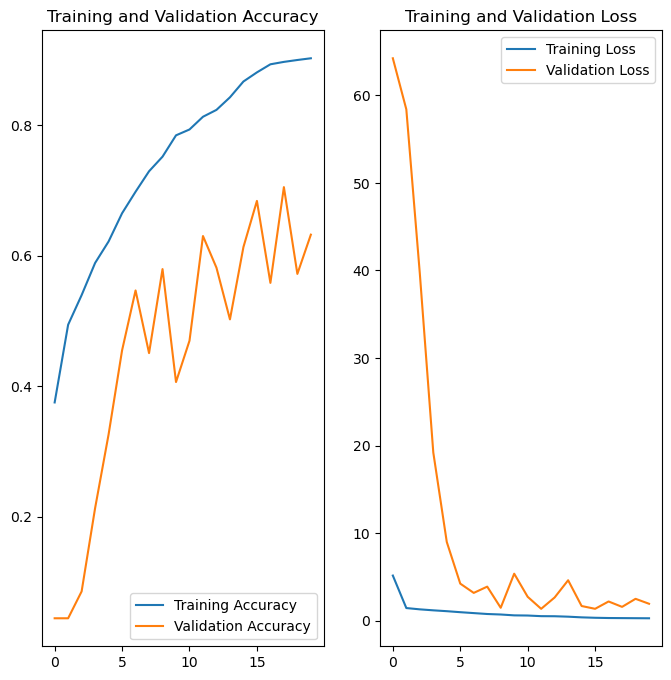

In [98]:
# Model - 4 visualization
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [94]:
# Model Performance
train_score = model4.evaluate(train_ds , steps =16 , verbose = 1)
valid_score = model4.evaluate(val_ds , steps = 16 , verbose = 1)
#test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)

16/16 [==============================] - 2s 93ms/step - loss: 1.1550 - accuracy: 0.7344
Train Loss:  1.3121023178100586
Train Accuracy:  0.744140625
--------------------
Validation Loss:  1.1549608707427979
Validation Accuracy:  0.734375
--------------------


#### Finding of Model-4 
Model details: 3 Convolution layers, without dropout and batchnormalization
- Train accuracy : 74%


- Test accuracy : 73%

- The model performance is satisfied but accuracy to be improved


# Model 5 (Convolution, Batchnormalization with L2 regulization)

In [55]:
# Initiate the L2 regulization
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers

In [57]:
# Model creation
from keras.layers import Dense, Dropout,Flatten, Conv2D, MaxPool2D, BatchNormalization
num_classes = 9
model5 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu',  kernel_regularizer=l2(0.01)),
  layers.Dropout(0.25),
  layers.Dense(num_classes),
  layers.Activation("softmax")
])

#----------------------------------
# Model compilation
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model5.summary())

#-----------------------------------
# Model execution

epochs = 20
history5 = model5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_12 (Ba  (None, 180, 180, 16)      64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 batch_normalization_13 (Ba  (None, 90, 90, 32)       

In [58]:
# Visualization of model performance
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Sequential

num_classes = 9
model5 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
  layers.Dropout(0.25),
  layers.Dense(num_classes),
  layers.Activation("softmax")
])

#----------------------------------
model5.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model5.summary())

#-----------------------------------

epochs = 20
history5 = model5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_9 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_15 (Ba  (None, 180, 180, 16)      64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_27 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 batch_normalization_16 (Ba  (None, 90, 90, 32)       

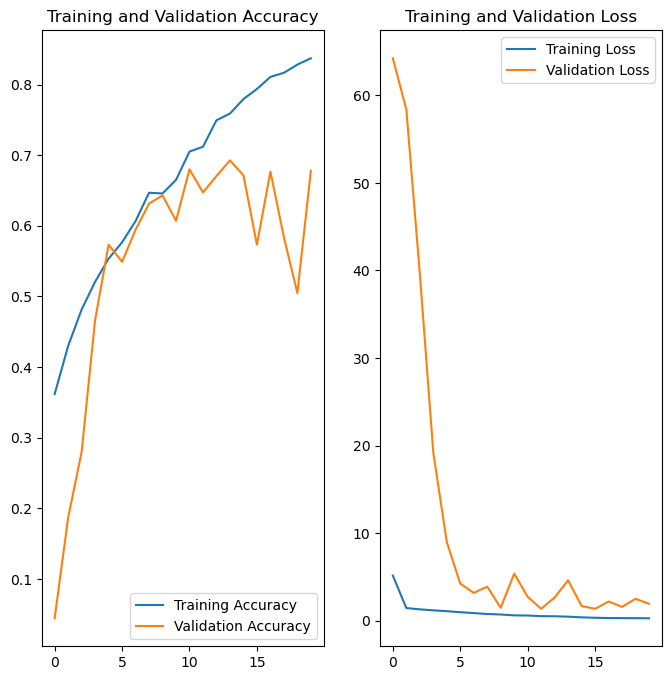

In [99]:
# Model - 5 visualization
acc = history5.history['accuracy']
val_acc = history5.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [100]:
# Model Performance
train_score = model5.evaluate(train_ds , steps =16 , verbose = 1)
valid_score = model5.evaluate(val_ds , steps = 16 , verbose = 1)
#test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)

16/16 [==============================] - 2s 103ms/step - loss: 1.2037 - accuracy: 0.7734
Train Loss:  1.2595109939575195
Train Accuracy:  0.765625
--------------------
Validation Loss:  1.2036622762680054
Validation Accuracy:  0.7734375
--------------------


#### Finding of Model-5 
Model details: 3 Convolution layers, without dropout and batchnormalization
- Train accuracy : 76%


- Test accuracy : 77%

- The model performance is satisfied but accuracy to be improved


# Creating the Model 6 (Convo, dropout, batchnormalization, l2)

In [59]:
# Creating the model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
num_classes = 9
model6 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu',  kernel_regularizer=l2(0.01)),
  layers.Dropout(0.25),
  layers.Dense(num_classes),
  layers.Activation("softmax")
])

#----------------------------------
# Model compilation
model6.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model6.summary())

#-----------------------------------
# Model execution
epochs = 20
history6 = model6.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_10 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_18 (Ba  (None, 180, 180, 16)      64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_30 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_11 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 90, 90, 32)       

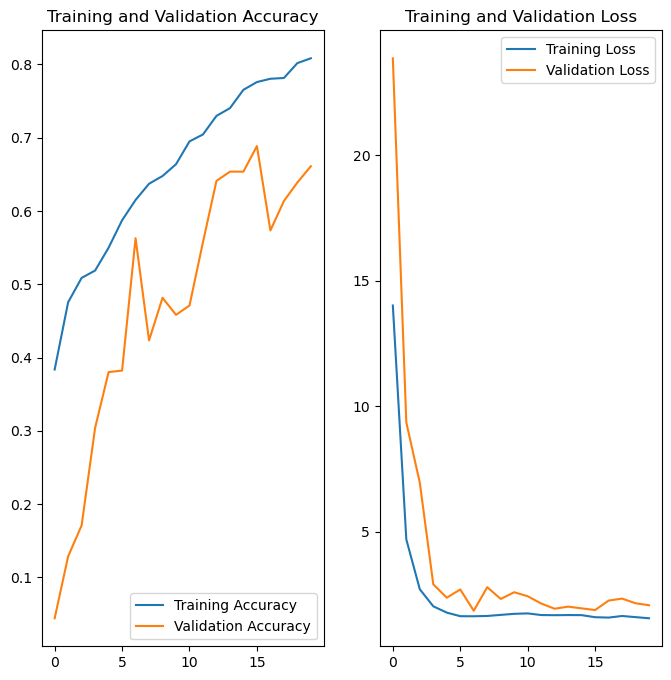

In [102]:
# Model - 6 visualization
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']

loss = history6.history['loss']
val_loss = history6.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [103]:
# Model Performance
train_score = model6.evaluate(train_ds , steps =16 , verbose = 1)
valid_score = model6.evaluate(val_ds , steps = 16 , verbose = 1)
#test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)

16/16 [==============================] - 5s 206ms/step - loss: 1.8863 - accuracy: 0.7227
Train Loss:  1.7423397302627563
Train Accuracy:  0.763671875
--------------------
Validation Loss:  1.8862698078155518
Validation Accuracy:  0.72265625
--------------------


#### Finding of Model-6 
Model details: 3 Convolution layers, without dropout and batchnormalization
- Train accuracy : 76%


- Test accuracy : 72%

- The model performance is satisfied but accuracy to be improved

# Creating the Model 7(adding the convolution layer on Model - 6)


In [60]:
# Creating the model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
num_classes = 9
model7 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu',  kernel_regularizer=l2(0.01)),
  layers.Dropout(0.25),
  layers.Dense(num_classes),
  layers.Activation("softmax")
])

#----------------------------------
# Model compilation
model7.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model7.summary())

#-----------------------------------
# Model execution

epochs = 20
history7 = model7.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_33 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 batch_normalization_21 (Ba  (None, 180, 180, 16)      64        
 tchNormalization)                                               
                                                                 
 max_pooling2d_33 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 90, 90, 16)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 90, 90, 32)      

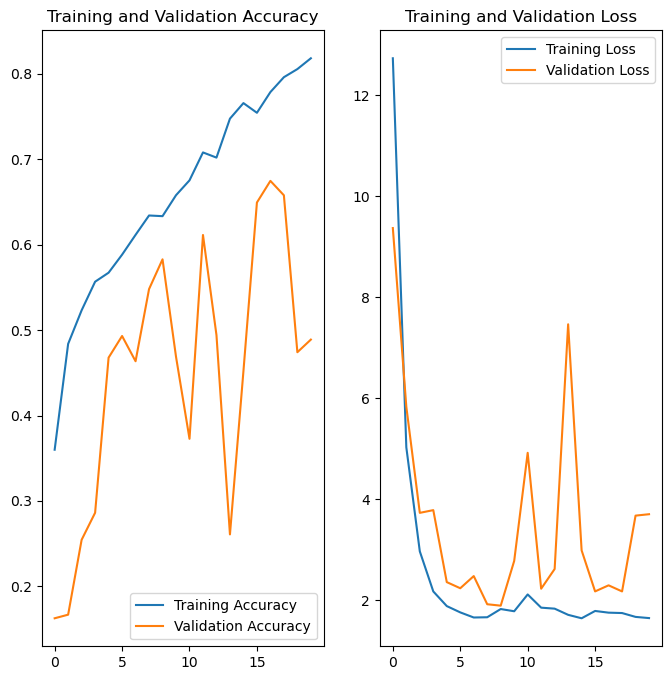

In [105]:
# Model - 7 visualization
acc = history7.history['accuracy']
val_acc = history7.history['val_accuracy']

loss = history7.history['loss']
val_loss = history7.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [106]:
# Model Performance
train_score = model7.evaluate(train_ds , steps =16 , verbose = 1)
valid_score = model7.evaluate(val_ds , steps = 16 , verbose = 1)
#test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)

16/16 [==============================] - 5s 212ms/step - loss: 3.1969 - accuracy: 0.5312
Train Loss:  3.1526410579681396
Train Accuracy:  0.556640625
--------------------
Validation Loss:  3.196892499923706
Validation Accuracy:  0.53125
--------------------


#### Finding of Model-7 
Model details: 3 Convolution layers, without dropout and batchnormalization
- Train accuracy : 55%


- Test accuracy : 53%

- The model performance is satisfied but accuracy to be improved

# Creating the Model 8 with higher the filters in convolution layers

In [61]:
#Creating the model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
num_classes = 9
model8 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  # layers.Conv2D(, 3, padding='same', activation='relu'),
  # layers.BatchNormalization(),
  # layers.MaxPooling2D(),
  # layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu',  kernel_regularizer=l2(0.01)),
  layers.Dropout(0.25),
  layers.Dense(num_classes),
  layers.Activation("softmax")
])

#----------------------------------
# Model compilation
model8.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model8.summary())

#-----------------------------------
# Model execution
epochs = 20
history8 = model8.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_12 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_25 (Ba  (None, 180, 180, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_37 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 90, 90, 64)      

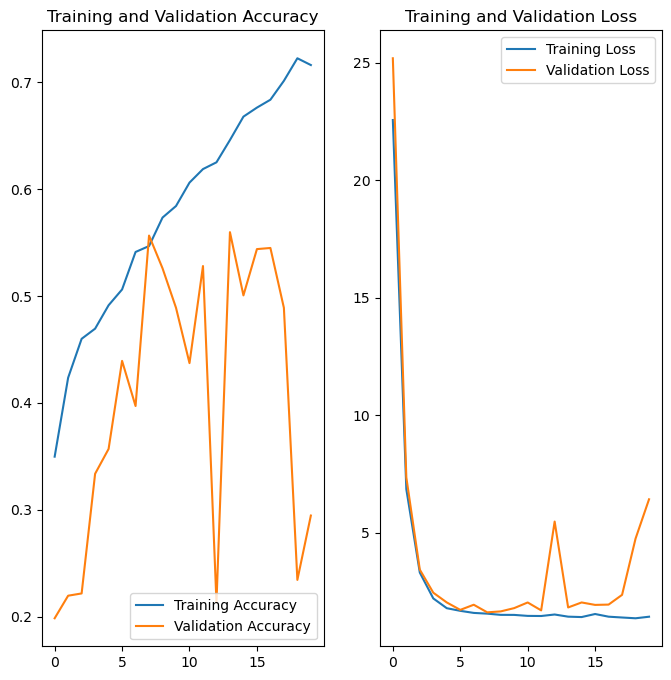

In [107]:
# Model - 8 visualization
acc = history8.history['accuracy']
val_acc = history8.history['val_accuracy']

loss = history8.history['loss']
val_loss = history8.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [108]:
# Model Performance
train_score = model8.evaluate(train_ds , steps =16 , verbose = 1)
valid_score = model8.evaluate(val_ds , steps = 16 , verbose = 1)
#test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)

16/16 [==============================] - 7s 334ms/step - loss: 5.5707 - accuracy: 0.3633
Train Loss:  5.756051063537598
Train Accuracy:  0.3359375
--------------------
Validation Loss:  5.570667743682861
Validation Accuracy:  0.36328125
--------------------


#### Finding of Model-8
Model details: 3 Convolution layers, without dropout and batchnormalization
- Train accuracy : 34%


- Test accuracy : 36%

- The model performance to be improved

# Model 9 (Adding convolution layer of 256 filter)

In [62]:
# Model creation
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
num_classes = 9
model9 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(256, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu',  kernel_regularizer=l2(0.01)),
  layers.Dropout(0.25),
  layers.Dense(num_classes),
  layers.Activation("softmax")
])

#----------------------------------
# Model compilation
model9.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model9.summary())

#-----------------------------------
# Model execution
epochs = 20
history9 = model9.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_13 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_28 (Ba  (None, 180, 180, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 90, 90, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_24 (Dropout)        (None, 90, 90, 32)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 90, 90, 64)      

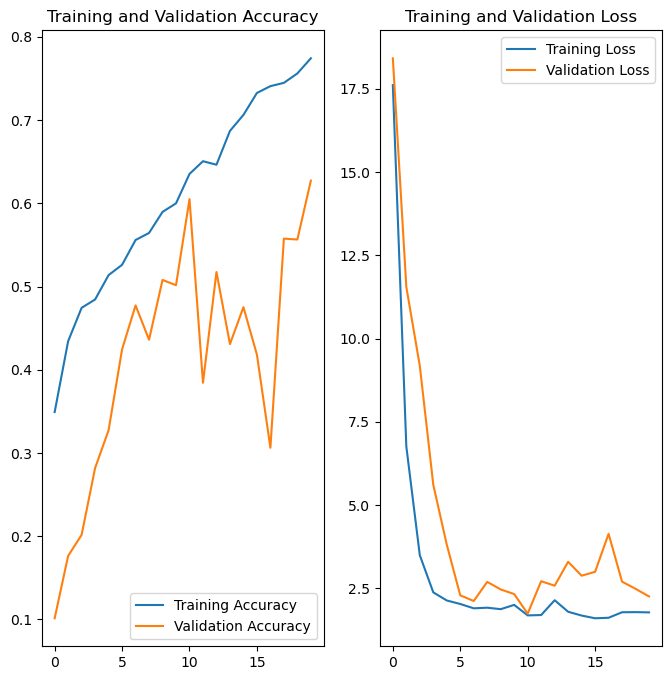

In [109]:
# Model - 9 visualization
acc = history9.history['accuracy']
val_acc = history9.history['val_accuracy']

loss = history9.history['loss']
val_loss = history9.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [110]:
# Model Performance
train_score = model9.evaluate(train_ds , steps =16 , verbose = 1)
valid_score = model9.evaluate(val_ds , steps = 16 , verbose = 1)
#test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)

16/16 [==============================] - 8s 394ms/step - loss: 2.1010 - accuracy: 0.6660
Train Loss:  2.002704381942749
Train Accuracy:  0.68359375
--------------------
Validation Loss:  2.101018190383911
Validation Accuracy:  0.666015625
--------------------


#### Finding of Model-9
Model details: 3 Convolution layers with higher filter, without dropout and batchnormalization
- Train accuracy : 69%


- Test accuracy : 67%

- The model performance to be improved

# Modle 10

In [63]:
# Model creation
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
num_classes = 9
model10 = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Dropout(0.25),
  layers.Flatten(),
  layers.Dense(512, activation='relu',  kernel_regularizer=l2(0.01)),
  layers.Dropout(0.25),
  layers.Dense(num_classes),
  layers.Activation("softmax")
])

#----------------------------------
# Model compilation
model10.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model10.summary())

#-----------------------------------
#Model creation
epochs = 20
history10 = model10.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_14 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_44 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 batch_normalization_32 (Ba  (None, 180, 180, 64)      256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_44 (MaxPooli  (None, 90, 90, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_29 (Dropout)        (None, 90, 90, 64)        0         
                                                                 
 conv2d_45 (Conv2D)          (None, 90, 90, 64)      

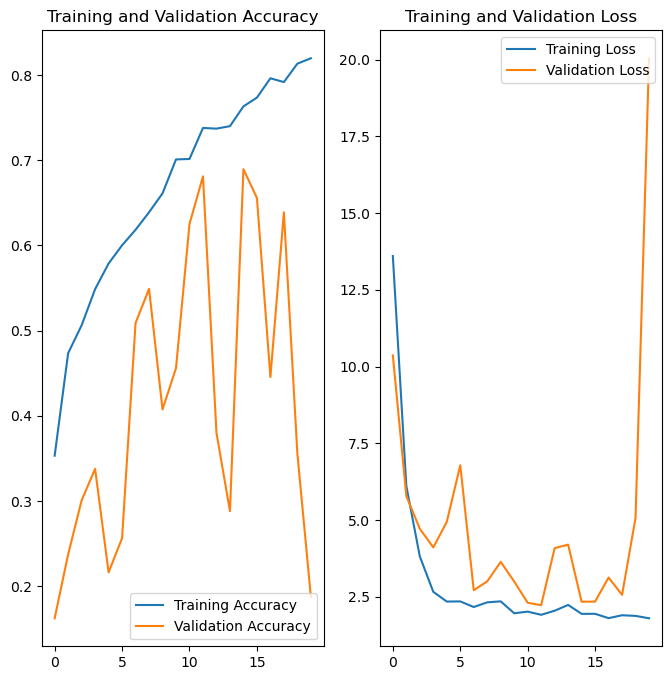

In [111]:
# Model - 10 visualization
acc = history10.history['accuracy']
val_acc = history10.history['val_accuracy']

loss = history10.history['loss']
val_loss = history10.history['val_loss']
epochs = 20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [112]:
# Model Performance
train_score = model10.evaluate(train_ds , steps =16 , verbose = 1)
valid_score = model10.evaluate(val_ds , steps = 16 , verbose = 1)
#test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)

16/16 [==============================] - 9s 457ms/step - loss: 19.4361 - accuracy: 0.2090
Train Loss:  19.606365203857422
Train Accuracy:  0.19921875
--------------------
Validation Loss:  19.436094284057617
Validation Accuracy:  0.208984375
--------------------


#### Finding of Model-10
Model details: Convolution layers with higher filter, without dropout and batchnormalization
- Train accuracy : 19%


- Test accuracy : 20%

- The model performance dropped by adding the filters

- The data balancing to be check and implement

# Class Imbalance

In [66]:
# Getting the class balance 
path_list = [x for x in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list = [os.path.basename(os.path.dirname(y)) for y in glob(os.path.join(data_dir_train, '*', '*.jpg'))]
dataframe_dict_original = dict(zip(path_list, lesion_list))
df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
df

,Path,Label
0,D:\MS\Deep Learning\CNN\Group Case Study Melan...,actinic keratosis
1,D:\MS\Deep Learning\CNN\Group Case Study Melan...,actinic keratosis
2,D:\MS\Deep Learning\CNN\Group Case Study Melan...,actinic keratosis
3,D:\MS\Deep Learning\CNN\Group Case Study Melan...,actinic keratosis
4,D:\MS\Deep Learning\CNN\Group Case Study Melan...,actinic keratosis
...,...,...
2234,D:\MS\Deep Learning\CNN\Group Case Study Melan...,vascular lesion
2235,D:\MS\Deep Learning\CNN\Group Case Study Melan...,vascular lesion
2236,D:\MS\Deep Learning\CNN\Group Case Study Melan...,vascular lesion
2237,D:\MS\Deep Learning\CNN\Group Case Study Melan...,vascular lesion


Class=0, n=114 (5.092%)
Class=1, n=376 (16.793%)
Class=2, n=95 (4.243%)
Class=3, n=438 (19.562%)
Class=4, n=357 (15.945%)
Class=5, n=462 (20.634%)
Class=6, n=77 (3.439%)
Class=7, n=181 (8.084%)
Class=8, n=139 (6.208%)


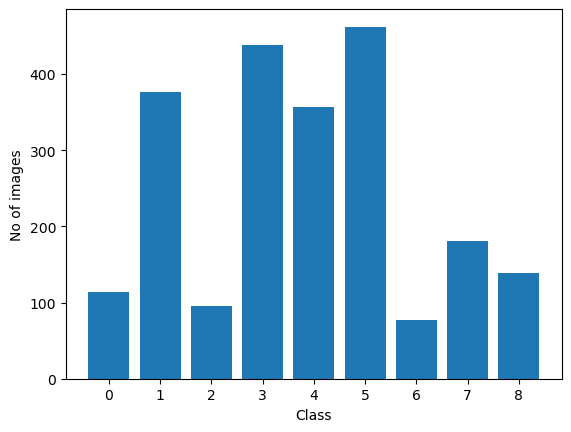

In [67]:
# Visualization the class distribution
from sklearn.preprocessing import LabelEncoder
from collections import Counter

X, y = df['Path'], df['Label']
y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))

plt.bar(counter.keys(), counter.values())
plt.xticks([i for i in range(9)])
plt.xlabel("Class")
plt.ylabel("No of images")
plt.show()

In [68]:
# !pip install Augmentor

In [113]:
# Augmentation of dataset
path_to_training_dataset = r"D:\MS\Deep Learning\CNN\Group Case Study Melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
import Augmentor
for i in class_names:
#     print(str(path_to_training_dataset) + "/" + i)
    p = Augmentor.Pipeline(str(path_to_training_dataset) + "/" + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to D:\MS\Deep Learning\CNN\Group Case Study Melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1ECEC273A10>: 100%|█| 500/500 [00:08<00:00, 56.16 Samples/


Initialised with 376 image(s) found.
Output directory set to D:\MS\Deep Learning\CNN\Group Case Study Melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1ECECAE8D50>: 100%|█| 500/500 [00:09<00:00, 54.18 Samples/


Initialised with 95 image(s) found.
Output directory set to D:\MS\Deep Learning\CNN\Group Case Study Melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/dermatofibroma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1ECECF86ED0>: 100%|█| 500/500 [00:09<00:00, 54.27 Samples/


Initialised with 438 image(s) found.
Output directory set to D:\MS\Deep Learning\CNN\Group Case Study Melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x1ECEC273290>: 100%|█| 500/500 [00:57<00:00,  8.70 Samples


Initialised with 357 image(s) found.
Output directory set to D:\MS\Deep Learning\CNN\Group Case Study Melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x1ECEC810350>: 100%|█| 500/500 [00:51<00:00,  9.65 Samples/


Initialised with 462 image(s) found.
Output directory set to D:\MS\Deep Learning\CNN\Group Case Study Melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train/pigmented benign keratosis\output.

Executing Pipeline:   0%|                                                                | 0/500 [00:03<?, ? Samples/s]


AttributeError: 'FileNotFoundError' object has no attribute 'message'

In [114]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

AttributeError: 'str' object has no attribute 'glob'

Lets see the distribution of augmented data after adding new images to the original training data.

In [72]:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
path_list

['D:\\MS\\Deep Learning\\CNN\\Group Case Study Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_11c03a7f-048e-4dce-98b5-e48cbb02f48c.jpg',
 'D:\\MS\\Deep Learning\\CNN\\Group Case Study Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_139752d5-40f0-42b7-b680-a5cbf264c8cf.jpg',
 'D:\\MS\\Deep Learning\\CNN\\Group Case Study Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_181c5fbe-cc74-4623-981a-60a8383eb41a.jpg',
 'D:\\MS\\Deep Learning\\CNN\\Group Case Study Melanoma\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_1a2265ab-b211-4

In [73]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [74]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [75]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = df.append(df2)

C:\Users\rse703589\AppData\Local\Temp\ipykernel_26572\2621963877.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = df.append(df2)


In [76]:
new_df['Label'].value_counts()

melanoma                      1938
basal cell carcinoma          1876
nevus                         1857
actinic keratosis             1614
dermatofibroma                1595
pigmented benign keratosis     462
squamous cell carcinoma        181
vascular lesion                139
seborrheic keratosis            77
Name: Label, dtype: int64

Train the model on the data created using Augmentor

In [77]:
new_df.shape

(9739, 2)

In [78]:
batch_size = 32
img_height = 180
img_width = 180


# Create a training dataset again

In [79]:
data_dir_train="D:\MS\Deep Learning\CNN\Group Case Study Melanoma\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset ="training",## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 9739 files belonging to 9 classes.
Using 7792 files for training.


# Create a validation dataset

In [80]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9739 files belonging to 9 classes.
Using 1947 files for validation.


# Create your Model_Aug - 1

In [81]:
# Creating the model_aug-1 
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model_AUG_1 = Sequential([data_augmentation,
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model_AUG_1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

print(model_AUG_1.summary())

epochs = 30
history_AUG_1 = model_AUG_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_16 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_17 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_58 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_58 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_59 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_59 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                               

ValueError: x and y must have same first dimension, but have shapes (20,) and (30,)

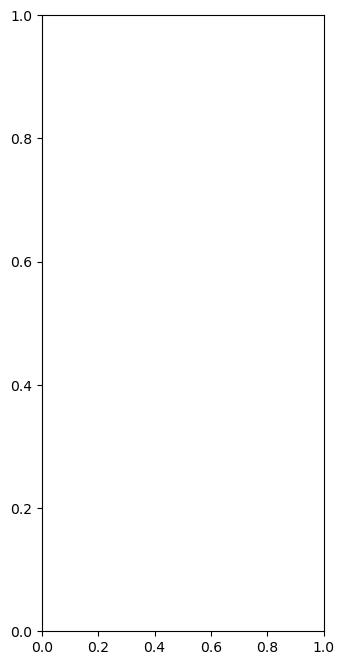

In [115]:
# Visualize the model performance
acc = history_AUG_1.history['accuracy']
val_acc = history_AUG_1.history['val_accuracy']

loss = history_AUG_1.history['loss']
val_loss = history_AUG_1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [116]:
# Model Performance
train_score = model_AUG_1.evaluate(train_ds , steps =16 , verbose = 1)
valid_score = model_AUG_1.evaluate(val_ds , steps = 16 , verbose = 1)
#test_score = model.evaluate(test_gen , steps = 16 , verbose = 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)

16/16 [==============================] - 5s 205ms/step - loss: 0.4089 - accuracy: 0.8730
Train Loss:  0.25217342376708984
Train Accuracy:  0.9140625
--------------------
Validation Loss:  0.4088554084300995
Validation Accuracy:  0.873046875
--------------------


#### Finding of Model_AUG-1
Model details: Convolution layers with higher filter, without dropout and batchnormalization
- Train accuracy : 91.4%


- Test accuracy : 87.3%

- The model performance with augumentation is the best model for the problem